In [ ]:
import numpy as np  #useful for scientific computing 
import pandas as pd  #primart data structure liabrary
import seaborn as sns
import folium

In [ ]:
#importing dataset (excel file) and finding some attributes

df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                        sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')
print(df_can.info())
print('')
print(df_can.describe())
print('')
print(df_can.columns.values.tolist())

print('')
print(df_can.index.values.tolist())
print('')
print(df_can.shape)

Data read into a pandas dataframe!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-n

In [ ]:
#Cleaning the dataset to remove unnecessary columns by drop() method 
df_can.drop(['Type','Coverage','AREA','REG','DEV'],axis=1, inplace=True)
df_can.head(5)


,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [ ]:
#Changing names of coulumns so they make more sense
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
print(df_can.columns)

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')


In [ ]:
df_can['Total']=df_can.sum(axis=1)
print(df_can)

            Country Continent              Region  ...  2012  2013  Total
0       Afghanistan      Asia       Southern Asia  ...  2635  2004  58639
1           Albania    Europe     Southern Europe  ...   620   603  15699
2           Algeria    Africa     Northern Africa  ...  3774  4331  69439
3    American Samoa   Oceania           Polynesia  ...     0     0      6
4           Andorra    Europe     Southern Europe  ...     1     1     15
..              ...       ...                 ...  ...   ...   ...    ...
190        Viet Nam      Asia  South-Eastern Asia  ...  1731  2112  97146
191  Western Sahara    Africa     Northern Africa  ...     0     0      2
192           Yemen      Asia        Western Asia  ...   174   217   2985
193          Zambia    Africa      Eastern Africa  ...    46    59   1677
194        Zimbabwe    Africa      Eastern Africa  ...   437   407   8598

[195 rows x 39 columns]


In [ ]:
#Setting 'Country' as index name for easy navigation
df_can.set_index('Country',inplace=True)


In [ ]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,2985


In [ ]:
#Examples of information extraction using loc method to test whether 'Country' has been se as index name 

print(df_can.loc['Japan'])
print('')
print(df_can.loc['Japan',2013])
print('')
print(df_can.loc['Japan',[1980,1981,1982,1983,1984,1985]])

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [ ]:
"""
Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.
To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.
"""
df_can.columns = list(map(str, df_can.columns))
print(df_can.columns)
years= list(map(str, range(1980,2014)))
print(years)

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')
['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [ ]:
#Filtering dataset on Asian countries (Print true if country is in Southern Asia)
df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,1,0,1,0,1,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,6,13,4,23,29,32,40,31,66,132,155,104,157,236,272,363,313,404,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [ ]:

#Let's preview the changes made to dataframe 
print(df_can.shape)
print(df_can.columns)
print(df_can.head(2))

(195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')
            Continent           Region             DevName  ...  2012  2013  Total
Country                                                     ...                   
Afghanistan      Asia    Southern Asia  Developing regions  ...  2635  2004  58639
Albania        Europe  Southern Europe   Developed regions  ...   620   603  15699

[2 rows x 38 columns]


**Line Graph using Matplotlib**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Extract data for Haiti
haiti = df_can.loc['Haiti',years]
print(haiti.head())

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object


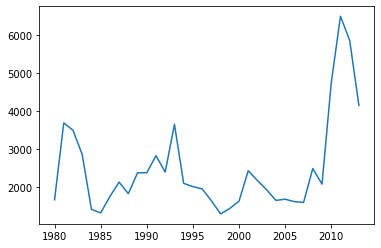

In [ ]:
#Creating a line plot by appending .plot() to the Haiti dataframe 
haiti.plot()

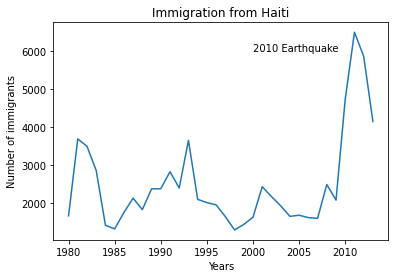

In [ ]:
haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(2000, 6000, '2010 Earthquake')
plt.show()


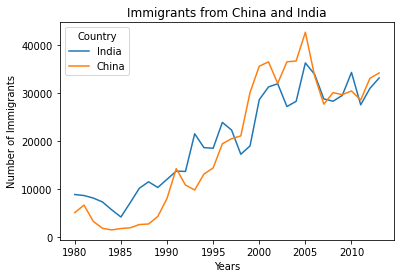

In [ ]:
df_CI = df_can.loc[['India','China'],years]
df_CI.head()
df_CI = df_CI.transpose()
df_CI.head()
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


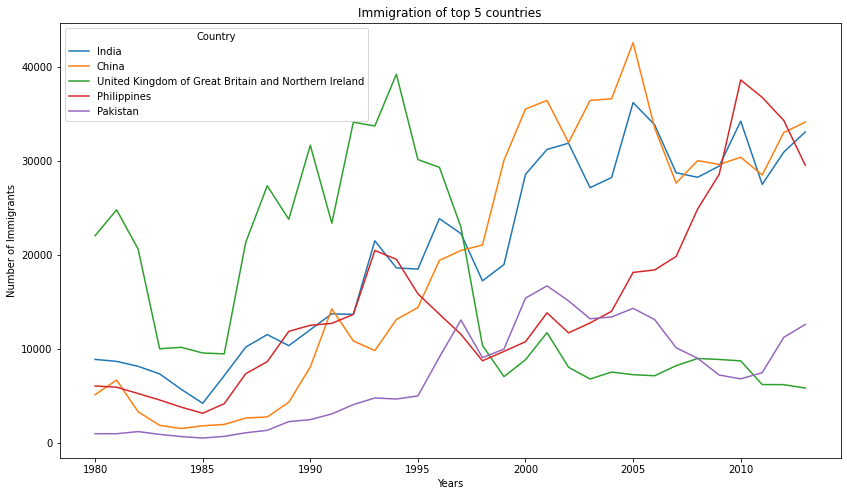

In [ ]:
#Compare the trend of top 5 countries that contributed the most to immigration to Canada

#Extract data by sort_values() method
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

#get top 5 countries 
df_top5= df_can.head()

#transpose the dataframe 
df_top5 = df_top5[years].transpose()

#Plotting the immigration data of top 5 countries 
df_top5.index = df_top5.index.map(int)  #changing index of data to int type
df_top5.plot(kind = 'line', figsize=(14,8))
plt.title('Immigration of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()


**AREA PLOTS, BAR GRAPHS AND HISTOGRAMS**

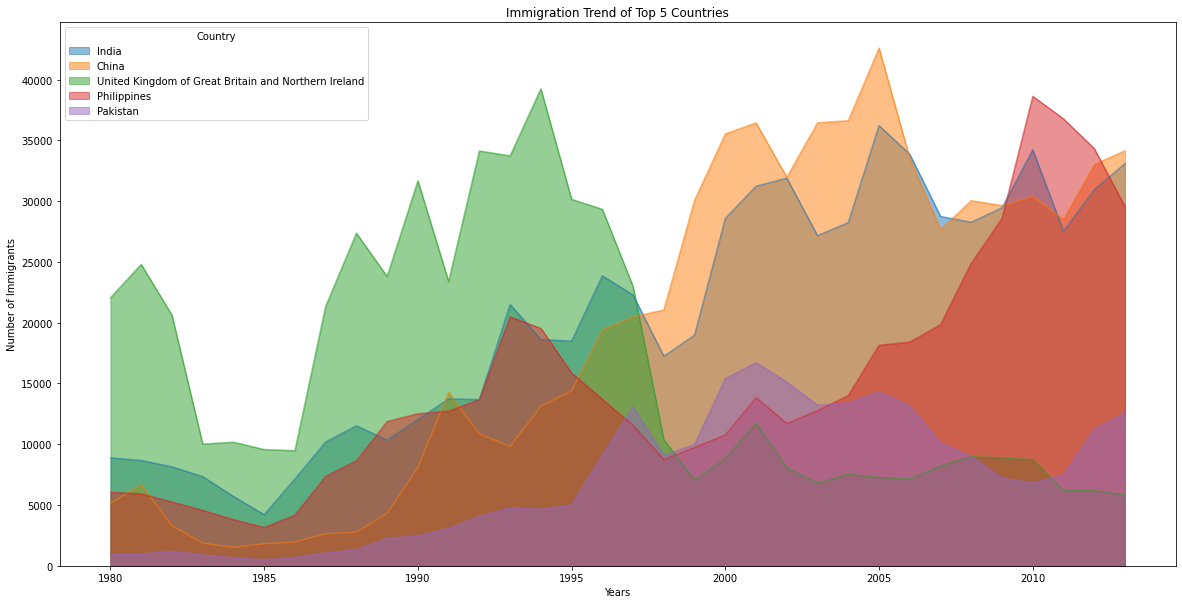

In [ ]:
df_top5.plot(kind='area', stacked= False, figsize=(20,10))

plt.title('Immigration Trend of Top 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()


**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]



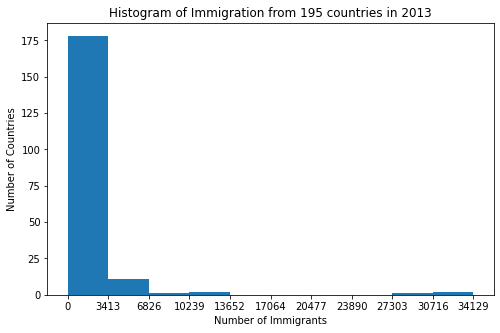

In [ ]:
#Extracting data
print(df_can['2013'].head())

print('')
#Finding count, bin_edges
count, bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)

print('')
#Plotting histogram
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

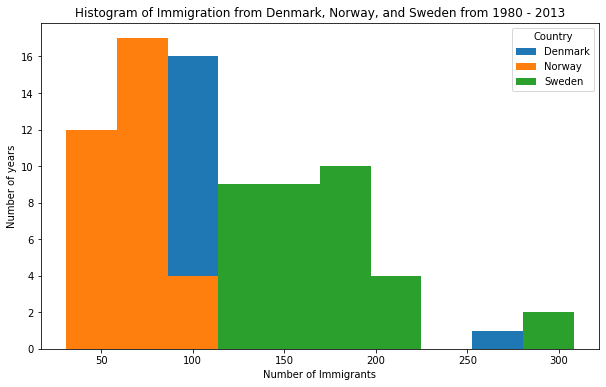

In [ ]:
#Extracting data
df_can.loc[['Denmark','Norway','Sweden'],years]

print('')

#Trandspose dataframe
df_t = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
df_t.head()

print('')

#Generate histogram 
df_t.plot(kind='hist', figsize=(10,6))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of years')
plt.xlabel('Number of Immigrants')
plt.show()

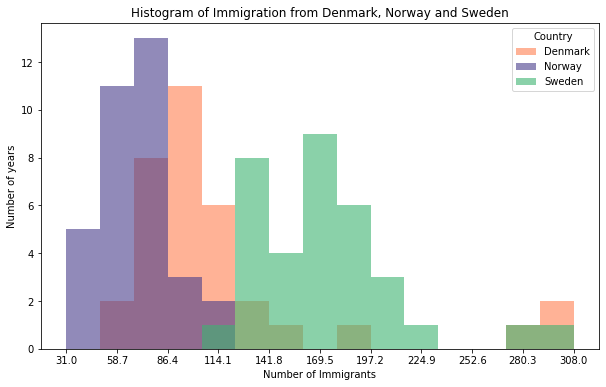

In [ ]:
"""
few modifications to improve the impact and aesthetics of the previous plot:

increase the bin size to 15 by passing in bins parameter
set transparency to 60% by passing in alpha paramemter
label the x-axis by passing in x-label paramater
change the colors of the plots by passing in color parameter
"""
count, bin_edges = np.histogram(df_t)
# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )
plt.title('Histogram of Immigration from Denmark, Norway and Sweden')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of years')

plt.show()

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object



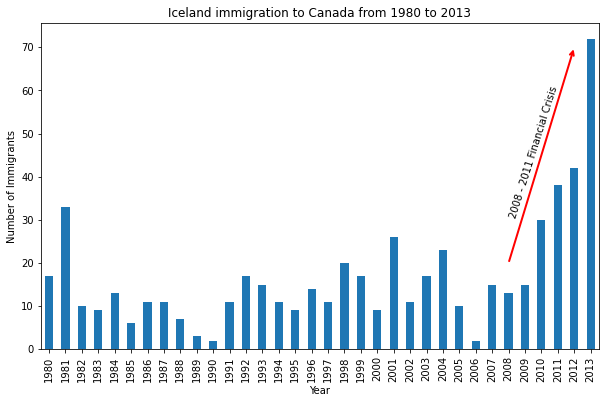

In [ ]:
#Extract data
df_iceland = df_can.loc['Iceland',years]
print(df_iceland.head())

print('')

#plot the graph
df_iceland.plot(kind = 'bar', figsize=(10,6))

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Iceland immigration to Canada from 1980 to 2013')


#Putting an arrow to show the 2008-2013 trend

#Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             rotation = 72.5,
             
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )

#Annotate text
plt.annotate('2008 - 2011 Financial Crisis', xy=(28,30), rotation=72.5, va='bottom', ha='left')
plt.show()


**PIE CHARTS**

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

                                  1980   1981   1982  ...    2012    2013    Total
Continent                                             ...                         
Africa                            3951   4363   3819  ...   38083   38543   618948
Asia                             31025  34314  30214  ...  152218  155075  3317794
Europe                           39760  44802  42720  ...   29177   28691  1410947
Latin America and the Caribbean  13081  15215  16769  ...   27173   24950   765148
Northern America                  9378  10030   9074  ...    7892    8503   241142
Oceania                           1942   1839   1675  ...    1679    1775    55174

[6 rows x 35 columns]


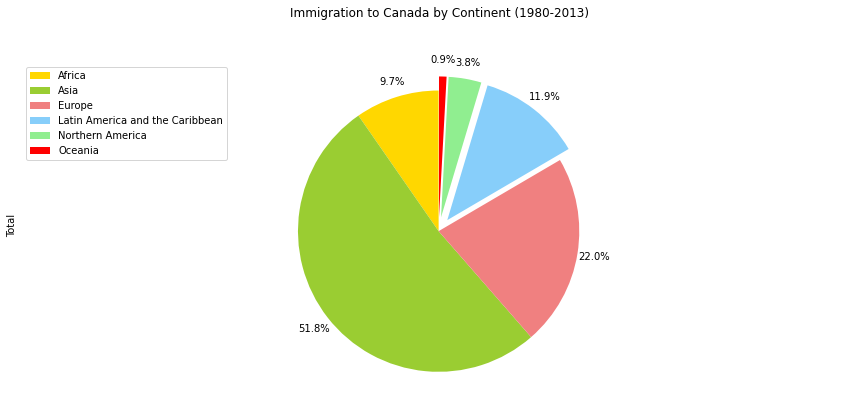

In [ ]:
#group countries by continents and apply sum() function
df_continents = df_can.groupby('Continent', axis = 0).sum()

print(df_continents)

#Plotting the graph
colours_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'red']
explode_list = [0,0,0,0.1,0.1,0.1]                  #for spacing between 2 edges and highlighting the lowest 3 continents
df_continents['Total'].plot(kind = 'pie',
                            figsize = (15,6),
                            autopct = '%1.1f%%',
                            startangle = 90,
                            shadow = False,          #turn off shadow of wedges 
                            labels = None,           #turn off labels  
                            pctdistance = 1.12,      #ration between pie center and start of label
                            colors = colours_list,   # colours of wedges list 
                            explode = explode_list)  #for highlighting lowest 3 continents 

plt.title('Immigration to Canada by Continent (1980-2013)',y=1.12)
plt.axis('equal')

#Add legend
plt.legend(labels = df_continents.index, loc = 'upper left')

plt.show()



**BOX PLOTS**

Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Country  India  China
1980      8880   5123
1981      8670   6682
1982      8147   3308
1983      7338   1863
1984      5704   1527


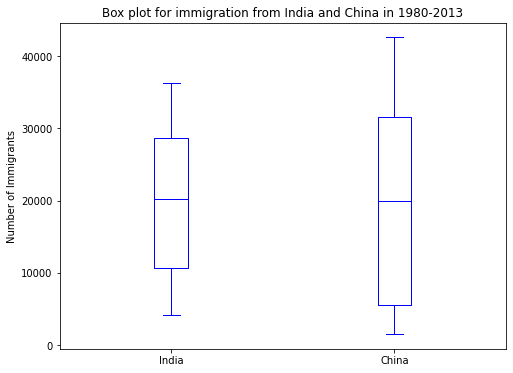

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


In [ ]:
#extract data as a datafram by putting extra square brackets around Japan
df_CI = df_can.loc[['India', 'China'], years].transpose()
print(df_CI.head())

#Plot the box plot 
df_CI.plot(kind='box', figsize=(8,6),color = 'blue')
plt.title('Box plot for immigration from India and China in 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

#Analysing boxplot 
df_CI.describe()



**SUBPLOTS**

Side by side comparison of the box plot with the line plot of China and India's immigration

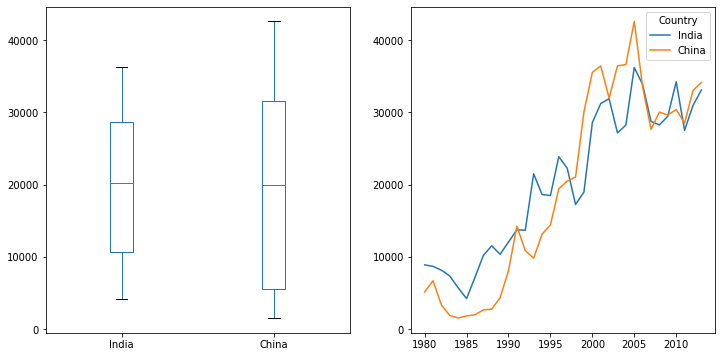

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#plotting subplot1: boxplot 
df_CI.plot (kind = 'box', figsize=(12,6), ax=ax0)
df_CI.plot (kind = 'line', figsize= (12,6), ax=ax1)



In [ ]:
    #Extract the data of top 15 countries based on 'Total'
    df_top15 = df_can.sort_values(['Total'], ascending = False, axis = 0).head(15)
    print( df_top15)
    
  # create a list of all years in decades 80's, 90's, and 00's
    years_80s = list(map(str, range(1980, 1990))) 
    years_90s = list(map(str, range(1990, 2000))) 
    years_00s = list(map(str, range(2000, 2010))) 

    print(years_80s)
    print(years_90s)
    print(years_00s)

    # slice the original dataframe df_can to create a series for each decade
    df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
    df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
    df_00s = df_top15.loc[:, years_00s].sum(axis=1)
    print( df_80s)
    print('')
    print( df_90s)
    print('')
    print( df_00s)

    
    # merge the three series into a new data frame
    new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

    # display dataframe
    new_df.head()
  
    

                                                                          Continent  ...   Total
Country                                                                              ...        
India                                                                          Asia  ...  691904
China                                                                          Asia  ...  659962
United Kingdom of Great Britain and Northern Ir...                           Europe  ...  551500
Philippines                                                                    Asia  ...  511391
Pakistan                                                                       Asia  ...  241600
United States of America                                           Northern America  ...  241122
Iran (Islamic Republic of)                                                     Asia  ...  175923
Sri Lanka                                                                      Asia  ...  148358
Republic of Korea             

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


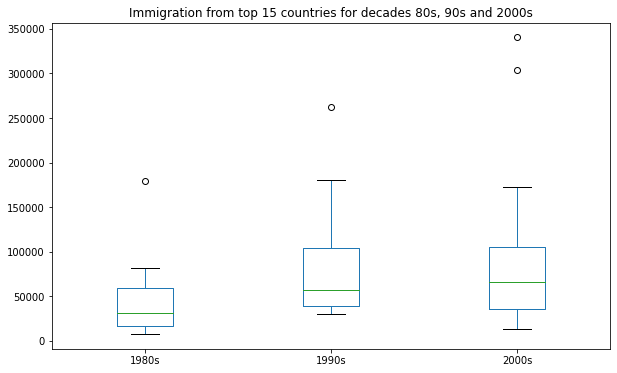

In [ ]:
#plotting the boxplot 
new_df.plot(kind = 'box', figsize = (10,6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()





**SCATTER PLOT**

In [ ]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']
df_tot.head()





,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


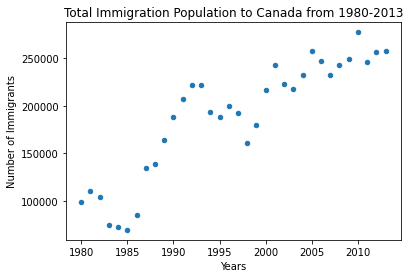

In [ ]:
df_tot.plot(kind = 'scatter', x= 'year', y ='total')

plt.title('Total Immigration Population to Canada from 1980-2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()


**CHOROPLETH MAPS**

In [ ]:
# define the world map
world_map = folium.Map()

# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

# display world map
world_map


**REGRESSION PLOTS**

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

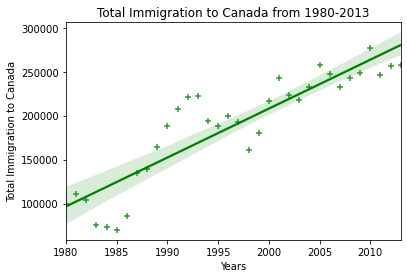

In [ ]:
ax = sns.regplot(x = 'year', y = 'total', data = df_tot,color='green', marker = '+') #plot regression plot 

ax.set(xlabel = 'Years', ylabel = 'Total Immigration to Canada')  #labelling x and y axis labels 

ax.set_title('Total Immigration to Canada from 1980-2013')  #giving title to graph


In [ ]:
# download countries geojson file
#geojson file gives boundaries of countries
!wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json
    
print('GeoJSON file downloaded!')

world_geo = r'world_countries.json' # geojson file4

# create a plain world map, location[0,0] and zoom level of 2
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map



GeoJSON file downloaded!


In [ ]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')



Data downloaded and read into a dataframe!


In [ ]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)




data dimensions: (195, 39)


In [ ]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration
print(threshold_scale)
# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map


[1, 138381, 276762, 415142, 553523, 691905]


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
